In [2]:
pip install folium==0.12.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
import os
import requests
import pprint
import json

서울시 자치구별 장애인 수

In [18]:
import pandas as pd

# 업로드된 파일 경로
file_path = './장애인+현황(장애유형별).xlsx'

# 엑셀 파일 불러오기
df = pd.read_excel(file_path)

In [19]:
# '계'에 해당하는 열 인덱스 찾기 (첫 번째 '2022')
col_index = df.columns.get_loc("2022")  # '계'에 해당하는 첫 번째 '2022' 열 인덱스

# 데이터 선택 (첫 3행을 제외하고 '소계'가 아닌 모든 행 선택)
filtered_df = df.iloc[3:, [1, col_index]]

# 새로운 데이터프레임 생성
new_df = filtered_df.rename(columns={'자치구별(2)': '자치구별', df.columns[col_index]: '계'})

# '소계'가 아닌 모든 행 선택
no_totals_df = new_df[new_df['자치구별'] != '소계']

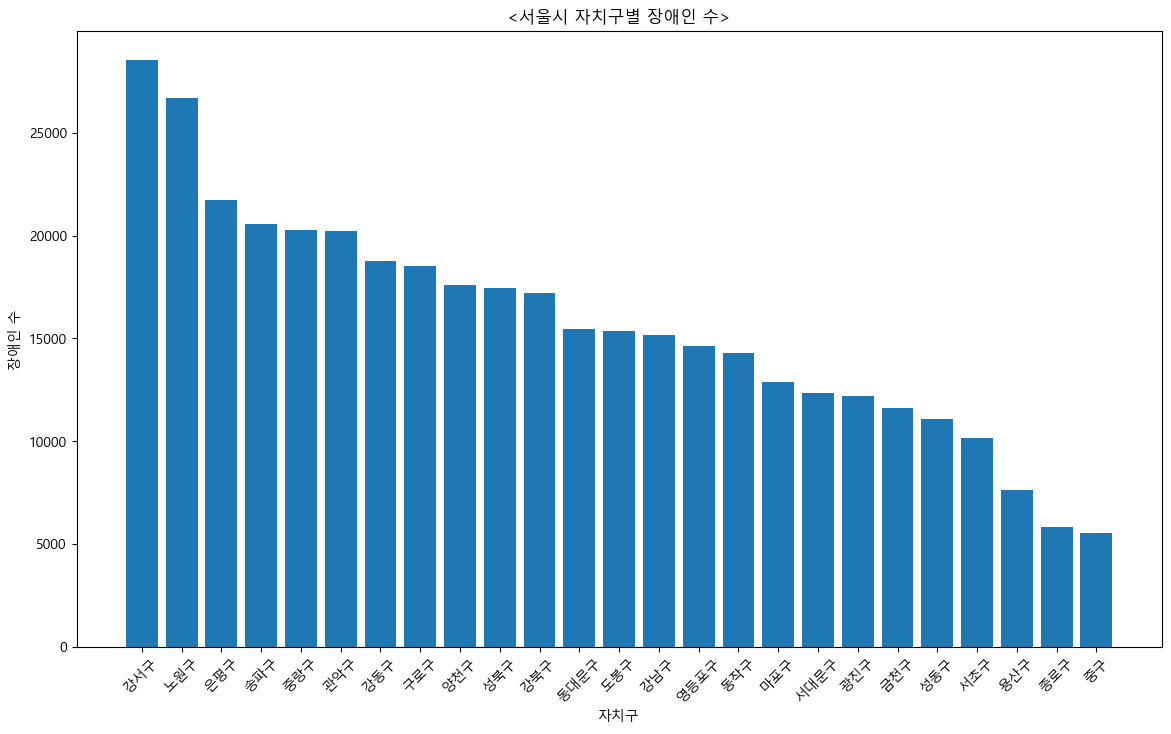

In [20]:
# '계' 열을 기준으로 내림차순 정렬
sorted_df = no_totals_df.sort_values(by='계', ascending=False)

# 막대그래프 그리기
plt.figure(figsize=(14, 8))
plt.bar(sorted_df['자치구별'], sorted_df['계'])
plt.title('<서울시 자치구별 장애인 수>')
plt.xlabel('자치구')
plt.ylabel('장애인 수')
plt.xticks(rotation=45)
plt.show()

파이 그래프

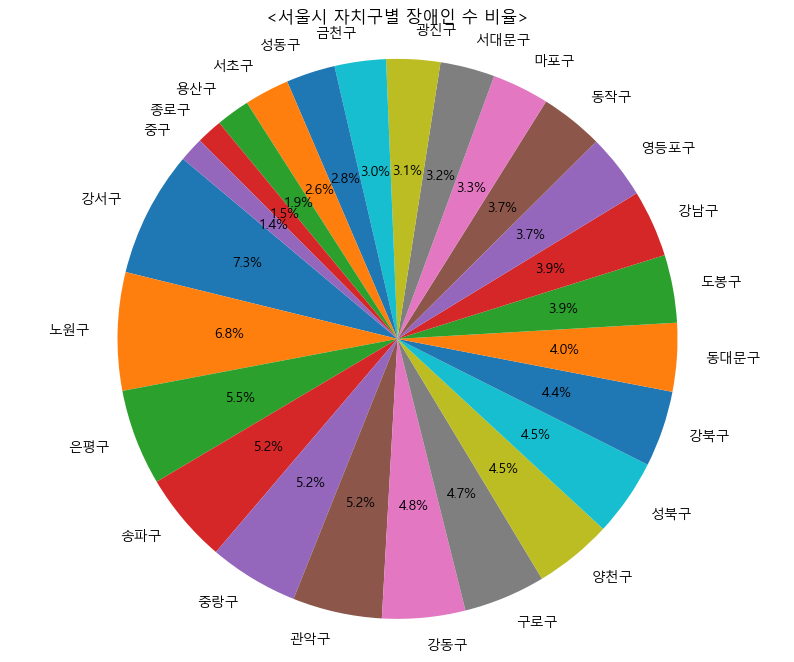

In [21]:
plt.figure(figsize=(10, 8))
plt.pie(sorted_df['계'], labels=sorted_df['자치구별'], autopct='%1.1f%%', startangle=140)
plt.title('<서울시 자치구별 장애인 수 비율>')
plt.axis('equal')  # 원형을 유지하기 위해
plt.show()

서울시 장애 유형별 인구 수 그래프

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [23]:
import pandas as pd

# 업로드한 파일 읽기
file_path = './장애인+현황(장애유형별).xlsx'
disabilities_df = pd.read_excel(file_path)

# '소계' 인덱스 행을 찾아 해당 데이터를 추출
subtotal_row = disabilities_df[disabilities_df['자치구별(2)'] == '소계']

disability_types = ['지체', '뇌병변', '시각', '청각', '언어', '지적장애', '자폐성', 
                    '정신장애', '신장장애', '심장장애', '호흡기', '간', '안면', 
                    '장루요루', '뇌전증']

# 장애 유형별 '계' 값을 담을 딕셔너리
disability_counts = {}

# 장애 유형별로 '계' 값을 추출
for dtype in disability_types:
    dtype_col = disabilities_df.columns[(disabilities_df.iloc[1] == dtype) & (disabilities_df.iloc[2] == '계')]
    if not dtype_col.empty:  # 해당하는 열이 있을 경우 값 추출
        disability_counts[dtype] = subtotal_row[dtype_col].values[0]

# 추출된 데이터를 내림차순으로 정렬
sorted_disability_counts = dict(sorted(disability_counts.items(), key=lambda item: item[1], reverse=True))

sorted_disability_counts

{'지체': array([164464], dtype=object),
 '청각': array([61995], dtype=object),
 '시각': array([40991], dtype=object),
 '뇌병변': array([39859], dtype=object),
 '지적장애': array([27634], dtype=object),
 '신장장애': array([18883], dtype=object),
 '정신장애': array([16546], dtype=object),
 '자폐성': array([7491], dtype=object),
 '언어': array([3421], dtype=object),
 '장루요루': array([3087], dtype=object),
 '간': array([2715], dtype=object),
 '호흡기': array([2156], dtype=object),
 '뇌전증': array([1234], dtype=object),
 '심장장애': array([998], dtype=object),
 '안면': array([385], dtype=object)}

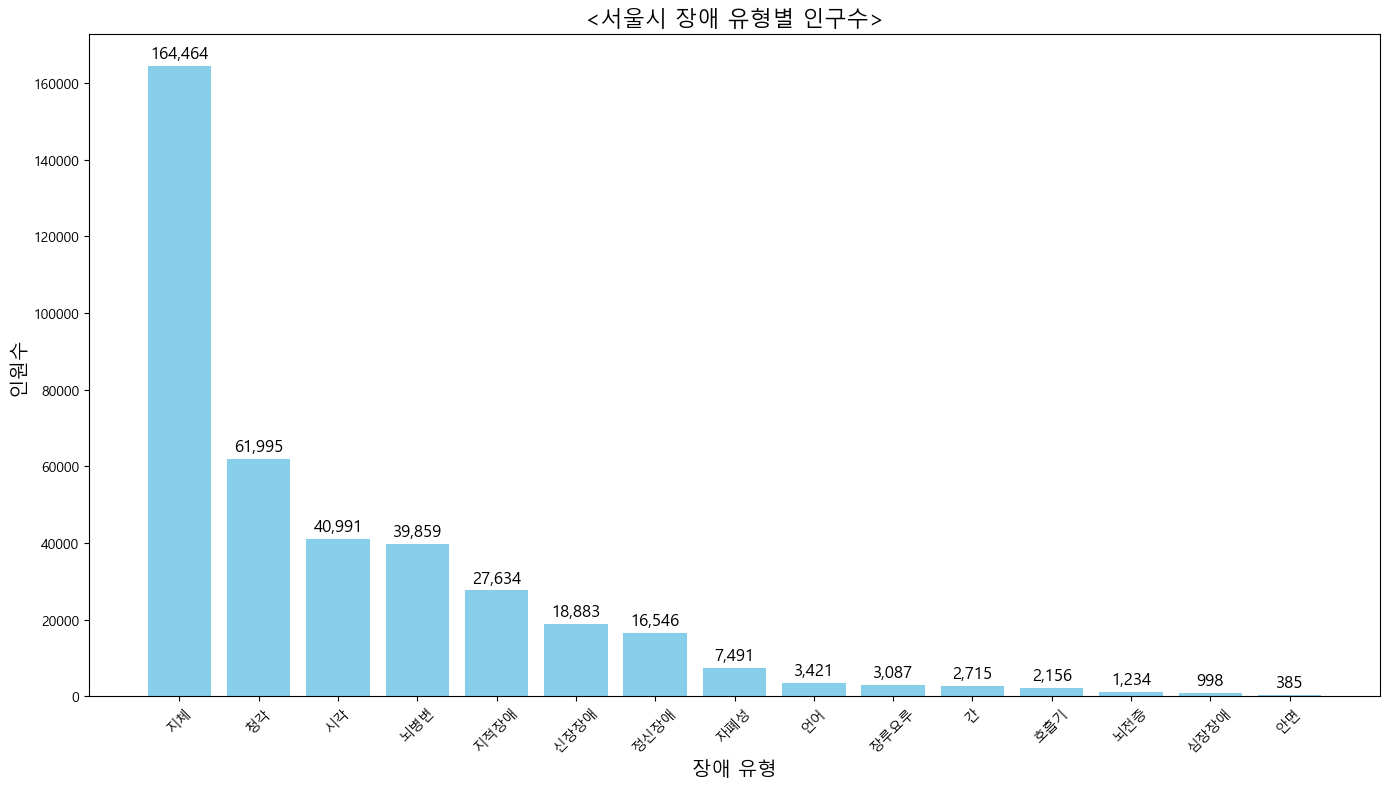

In [24]:
# 막대 그래프를 생성하기 위한 데이터 준비
disability_types_sorted = list(sorted_disability_counts.keys())
counts_sorted = [int(count) for count in sorted_disability_counts.values()]


# 막대 그래프 생성
fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(disability_types_sorted, counts_sorted, color='skyblue')

# 제목 및 레이블 추가
ax.set_title('<서울시 장애 유형별 인구수>', fontsize=16)
ax.set_xlabel('장애 유형', fontsize=14)
ax.set_ylabel('인원수', fontsize=14)

# 각 막대에 값 표시
for i, count in enumerate(counts_sorted):
    ax.text(i, count + 1000, f'{count:,}', ha='center', va='bottom', fontsize=12)

# 그래프 표시
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()

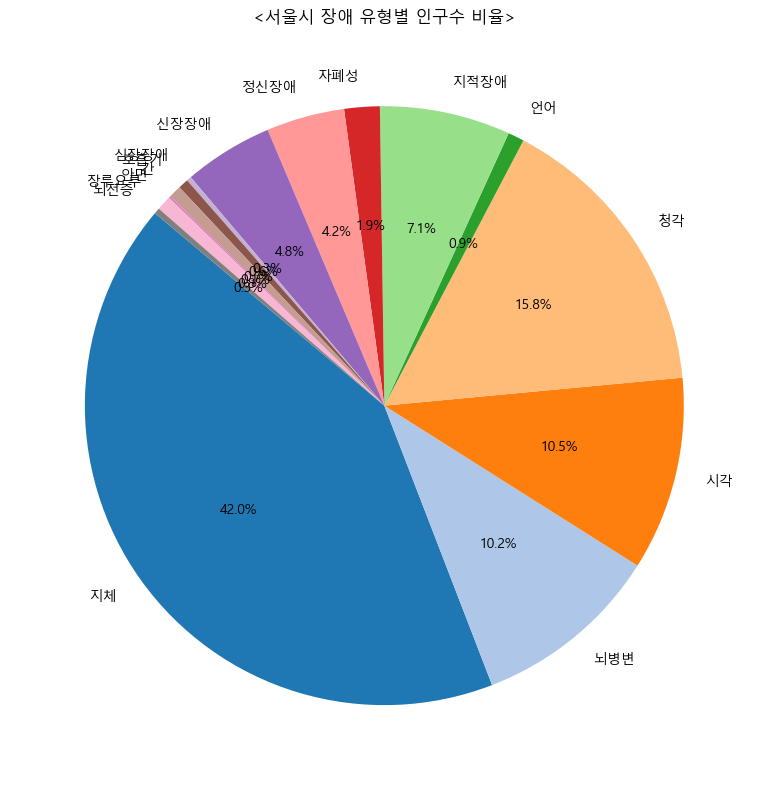

In [25]:
import matplotlib.pyplot as plt

# 장애 유형별 인구수 데이터를 파이 차트로 시각화
fig, ax = plt.subplots(figsize=(10, 8))

# 파이 차트에 사용할 값과 레이블 설정
values = [count[0] for count in disability_counts.values()]
labels = list(disability_counts.keys())

# 파이 차트 생성
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
ax.set_title('<서울시 장애 유형별 인구수 비율>')

# 파이 차트 표시
plt.tight_layout()
plt.show()
